In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

import random
# Use Hongjin Zhu's N number
random.seed(11993511)
np.random.seed(11993511)

Mounted at /content/drive


In [2]:
file_path1 = '/content/drive/MyDrive/Colab Notebooks/23Fall/spotify52kData.csv'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/23Fall/starRatings.csv'

cols = [i for i in range(5000)]
df = pd.read_csv(file_path1)
ratings_df = pd.read_csv(file_path2, names=cols)

In [3]:
ratings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
songs_df = df.head(5000)
songs_df.head()

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
mean_ratings = ratings_df.mean(axis=0)
mean_ratings

0       3.196939
1       1.361029
2       2.186377
3       1.576998
4       3.038835
          ...   
4995    0.833843
4996    2.368473
4997    0.914201
4998    0.890088
4999    0.795043
Length: 5000, dtype: float64

In [6]:
popularity = songs_df['popularity']

In [7]:
from scipy.stats import spearmanr

# test correlation between average ratings and popularity
# data non-linear, use spearman correlation
corr, p_value = spearmanr(mean_ratings, popularity)
print(f"Spearman correlation coefficient: {corr}")
print(f"p-value: {p_value}")

Spearman correlation coefficient: 0.5434586384562519
p-value: 0.0


<ipython-input-13-0a68dba9e1cb>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=popularity, y=mean_ratings, size=1, alpha=0.7, palette='viridis', legend=None)


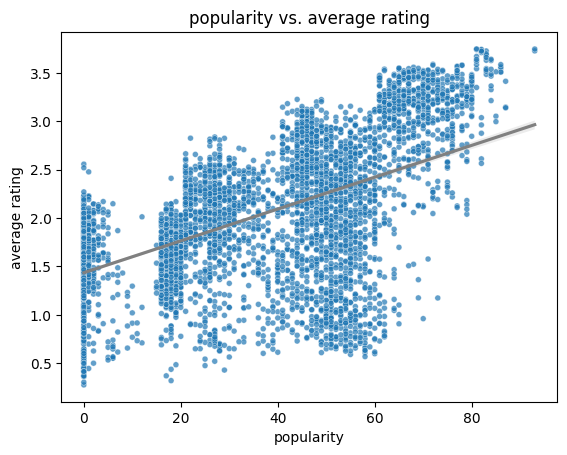

In [13]:
# plot the correlation
sns.scatterplot(x=popularity, y=mean_ratings, size=1, alpha=0.7, palette='viridis', legend=None)
sns.regplot(x=popularity, y=mean_ratings, scatter=False, color='gray')
plt.title('popularity vs. average rating')
plt.xlabel('popularity')
plt.ylabel('average rating')
plt.show()

In [9]:
song_popularity = pd.DataFrame({'song': popularity.index, 'average_rating': mean_ratings.values, 'popularity': popularity.values})
sorted_songs = song_popularity.sort_values(by='average_rating', ascending=False)
rec_songs = sorted_songs.head(10)
rec_songs

,song,average_rating,popularity
3877,3877,3.750000,81
3003,3003,3.748950,93
2260,2260,3.744554,82
2562,2562,3.743202,81
3216,3216,3.741969,82
2105,2105,3.737475,82
2003,2003,3.729651,93
2011,2011,3.729124,83
3464,3464,3.727829,82
3253,3253,3.727451,82


In [10]:
rec_songs['song'].values

array([3877, 3003, 2260, 2562, 3216, 2105, 2003, 2011, 3464, 3253])